In [24]:
# === Setup Instructions ===
# Before running this script, make sure you have the following packages installed:
!pip install librosa matplotlib numpy praat-parselmouth pandas

In [25]:
try:
    import librosa
    import matplotlib
    import numpy
    import parselmouth
    import pandas
    print("✅ All required libraries are already installed.")
except ImportError:
    print("🔧 Installing missing packages...")
    !pip install -q librosa matplotlib numpy praat-parselmouth pandas

    # Try again to confirm
    try:
        import librosa
        import matplotlib
        import numpy
        import parselmouth
        import pandas
        print("✅ Installation complete. All libraries are ready!")
    except ImportError as e:
        print("❌ Something went wrong during installation:", e)

✅ All required libraries are already installed.


In [26]:
# === Audio File Input ===
import os

# Prompt user for file path
user_input = input("🎤 Enter the path to your .wav file (or press Enter to use the default sample): ")

# Handle default vs custom path
if not user_input.strip():
    file_path = os.path.join("samples", "sample_audio.wav")
    print(f"📂 Using default file: {file_path}")
else:
    # Strip spaces and extra quotes if user pasted with quotes
    file_path = user_input.strip().strip('"')
    print(f"📂 Using custom file: {file_path}")

# Validate file path
if not os.path.isfile(file_path):
    raise FileNotFoundError(f"❌ File not found: {file_path}")

# Confirm successful connection
print("✅ Audio file loaded successfully and ready for analysis!")

🎤 Enter the path to your .wav file (or press Enter to use the default sample):  "C:\Users\Kayla Seenarine\OneDrive\Email attachments\Documents\audiology Testing and Diagnosis\Aral Rehab\Coding Course\projects\audio files\wav\test audio.wav"


📂 Using custom file: C:\Users\Kayla Seenarine\OneDrive\Email attachments\Documents\audiology Testing and Diagnosis\Aral Rehab\Coding Course\projects\audio files\wav\test audio.wav
✅ Audio file loaded successfully and ready for analysis!


In [27]:
import numpy as np

In [28]:
# === Load and Analyze Audio ===
y, sr = librosa.load(file_path)
snd = parselmouth.Sound(file_path)

# Spectrogram
S = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(S))

# Pitch (YIN algorithm)
pitch = librosa.yin(y, fmin=75, fmax=300)

# Formants (Praat Burg method)
formants = snd.to_formant_burg()
times = np.linspace(0, snd.duration, 100)
f1 = [formants.get_value_at_time(1, t) for t in times]
f2 = [formants.get_value_at_time(2, t) for t in times]
f3 = [formants.get_value_at_time(3, t) for t in times]

print("✅ Pitch and formants extracted successfully!")


✅ Pitch and formants extracted successfully!


In [29]:
import pandas as pd

# Match pitch to formant times (use interpolation)
pitch_interp = np.interp(times, librosa.times_like(pitch), pitch)

# Create a DataFrame
df = pd.DataFrame({
    "time": times,
    "pitch": pitch_interp,
    "F1": f1,
    "F2": f2,
    "F3": f3
})

# Save to CSV
csv_path = "voice_features.csv"
df.to_csv(csv_path, index=False)
print(f"✅ Features saved to: {csv_path}")

✅ Features saved to: voice_features.csv


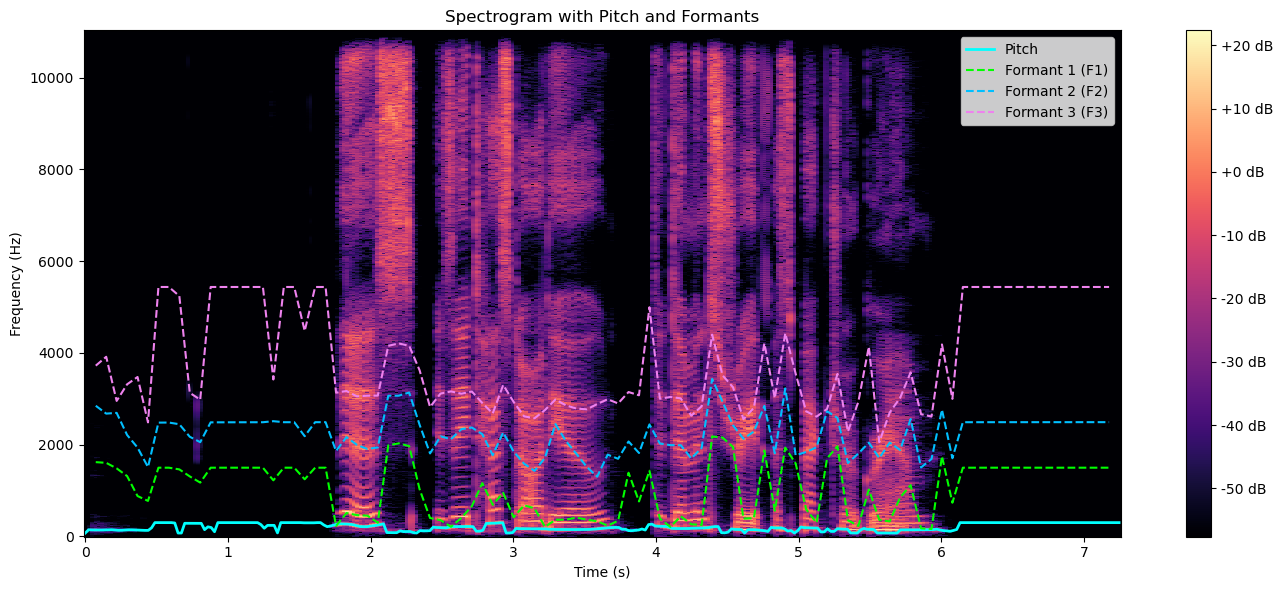

In [30]:
import matplotlib.pyplot as plt
import librosa.display

# === Plot Spectrogram with Pitch and Formants ===
plt.figure(figsize=(14, 6))

# Spectrogram background
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz', cmap='magma')

# Pitch
plt.plot(librosa.times_like(pitch), pitch, color='cyan', linewidth=2, label='Pitch')

# Formants
plt.plot(times, f1, color='lime', linestyle='--', linewidth=1.5, label='Formant 1 (F1)')
plt.plot(times, f2, color='deepskyblue', linestyle='--', linewidth=1.5, label='Formant 2 (F2)')
plt.plot(times, f3, color='violet', linestyle='--', linewidth=1.5, label='Formant 3 (F3)')

# Labels
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram with Pitch and Formants")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()
